In [3]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import mglearn
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC 

plt.rcParams['font.family']='AppleGothic'
plt.rcParams['axes.unicode_minus']=False

# 이진 분류 (binary classification) 

예측을 위한 방정식  
$\hat{y}=w[0]\times x[0] + w[1]\times x[1]+\dots+w[p]\times x[p] + b >0$  
특성들의 예측한 값을 임계치 0과 비교함.  
    - 함수에서 계산한 값이 0보다 작으면 ==> 클래스 -1, -보다 크면 ==> +1    

- 분류용 선형 모델에서는 결정 경계가 입력의 선형 함수.  
- 손실함수 (loss function)에 대한 차이는 크게 중요하지 않음.  

선형 분류 알고리즘  
- 로지스틱 회귀 (logistic regression)
- 서포트 벡터 머신 (support vector machine)

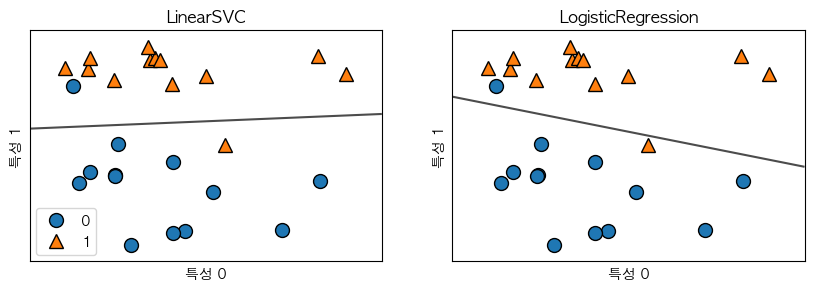

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC 

X,y = mglearn.datasets.make_forge()

fig,axes = plt.subplots(1,2,figsize=(10,3))

for model, ax in zip([LinearSVC(max_iter=5000),LogisticRegression()],axes):
    clf = model.fit(X,y)
    mglearn.plots.plot_2d_separator(clf,X,fill=False,eps=0.5, ax=ax,alpha=0.7)
    mglearn.discrete_scatter(X[:,0],X[:,1],y,ax=ax)
    ax.set_title(clf.__class__.__name__)
    ax.set_xlabel('특성 0')
    ax.set_ylabel('특성 1')
axes[0].legend()

두 모델은 기본적으로 L2 규제 사용  
규제의 강도는 매개변수 C를 통해 결정. C가 높아지면 규제가 감소함.  

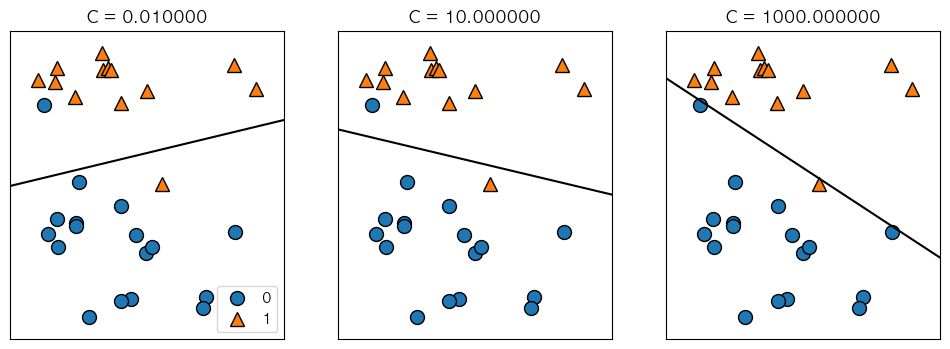

In [5]:
mglearn.plots.plot_linear_svc_regularization()

## 유방암 데이터셋을 사용한 LogisticRegression

In [6]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)
logreg = LogisticRegression(max_iter=5000).fit(X_train,y_train)

print("훈련 세트 점수 : {:.3f}".format(logreg.score(X_train,y_train)))
print("테스트 세트 점수 : {:.3f}".format(logreg.score(X_test,y_test)))

훈련 세트 점수 : 0.958
테스트 세트 점수 : 0.958


In [7]:
# C 증가 ==> 복잡도가 높은 모델일수록 성능이 좋음
logreg100 = LogisticRegression(C=100, max_iter=5000).fit(X_train,y_train)
print("훈련 세트 점수 : {:.3f}".format(logreg100.score(X_train,y_train)))
print("테스트 세트 점수 : {:.3f}".format(logreg100.score(X_test,y_test)))

훈련 세트 점수 : 0.984
테스트 세트 점수 : 0.965


/Users/isumi/anaconda3/envs/ML/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [9]:
# C= 0.01  ==> 과소적합되어 훈련세트와 테스트 세트의 정확도는 기본 매개변수일때보다는 낮아짐
logreg001 = LogisticRegression(C=0.01,max_iter=5000).fit(X_train,y_train)
print("훈련 세트 점수 : {:.3f}".format(logreg001.score(X_train,y_train)))
print("테스트 세트 점수 : {:.3f}".format(logreg001.score(X_test,y_test)))

훈련 세트 점수 : 0.953
테스트 세트 점수 : 0.951


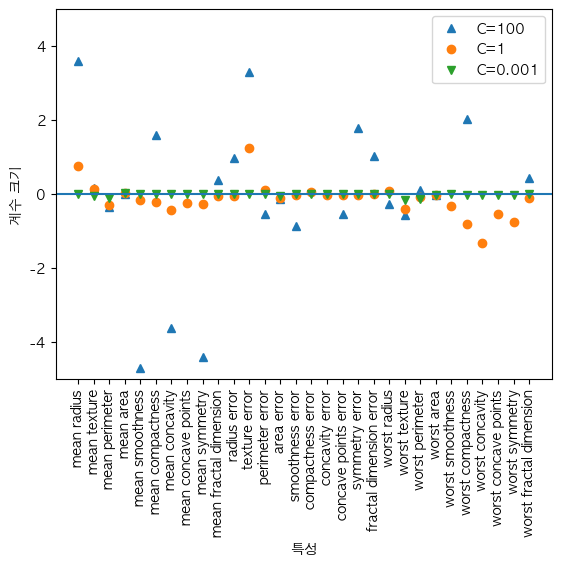

In [10]:
# model's coefficients depends on regularization parameter C 

plt.plot(logreg100.coef_.T,'^',label="C=100")
plt.plot(logreg.coef_.T,'o',label='C=1')
plt.plot(logreg001.coef_.T,'v',label='C=0.001')
plt.xticks(range(cancer.data.shape[1]),cancer.feature_names,rotation=90)
xlims=plt.xlim()
plt.hlines(0,xlims[0],xlims[1])
plt.xlim(xlims)
plt.ylim(-5,5)
plt.xlabel("특성")
plt.ylabel("계수 크기")
plt.legend()

L1 규제 사용

C=0.001 인 l1 로지스틱 회귀의 훈련 정확도 : 0.91
C=0.001 인 l1 로지스틱 회귀의 테스트 정확도 : 0.92
C=1.000 인 l1 로지스틱 회귀의 훈련 정확도 : 0.96
C=1.000 인 l1 로지스틱 회귀의 테스트 정확도 : 0.96
C=100.000 인 l1 로지스틱 회귀의 훈련 정확도 : 0.99
C=100.000 인 l1 로지스틱 회귀의 테스트 정확도 : 0.98


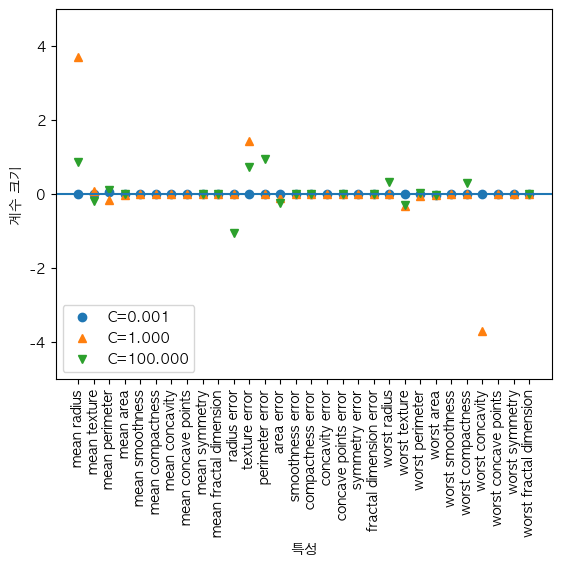

In [11]:
for C, marker in zip ([0.001,1,100],['o','^','v']):
    lr_l1=LogisticRegression(solver='liblinear',C=C,penalty='l1',max_iter=1000).fit(X_train,y_train)
    print("C={:.3f} 인 l1 로지스틱 회귀의 훈련 정확도 : {:.2f}".format(C, lr_l1.score(X_train,y_train)))
    print("C={:.3f} 인 l1 로지스틱 회귀의 테스트 정확도 : {:.2f}".format(C, lr_l1.score(X_test,y_test)))
    plt.plot(lr_l1.coef_.T,marker,label="C={:.3f}".format(C))
    
plt.xticks(range(cancer.data.shape[1]),cancer.feature_names,rotation=90)
xlims=plt.xlim()
plt.hlines(0,xlims[0],xlims[1])
plt.xlim(xlims)
plt.xlabel("특성")
plt.ylabel("계수 크기")

plt.ylim(-5,5)
plt.legend(loc=3)